In [ ]:
!apt install libspatialindex-dev
!pip install rtree
!pip install osmnx

In [ ]:
!pip install geopandas

In [ ]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
shape_sen1 = '/content/drive/MyDrive/Official Folder of GPSDD Food Security Senegal Challenge/Data/Shapefiles/Nation/gadm36_SEN_1.shp'

In [ ]:
df = gpd.read_file(shape_sen1)
df.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,SEN,Senegal,SEN.1_1,Dakar,Cap Vert|Dacar,None,Région,Region,1,SN.DK,"MULTIPOLYGON (((-17.46736 14.65097, -17.46736 ..."
1,SEN,Senegal,SEN.2_1,Diourbel,None,None,Région,Region,3,SN.DB,"MULTIPOLYGON (((-15.84110 15.00658, -15.84053 ..."
2,SEN,Senegal,SEN.3_1,Fatick,None,None,Région,Region,9,SN.FK,"MULTIPOLYGON (((-16.63903 13.68069, -16.63903 ..."
3,SEN,Senegal,SEN.4_1,Kaffrine,None,None,Région,Region,12,SN.KF,"POLYGON ((-14.99165 13.80161, -14.99178 13.801..."
4,SEN,Senegal,SEN.5_1,Kaolack,None,None,Région,Region,6,SN.KC,"POLYGON ((-15.47223 13.59724, -15.47245 13.595..."


In [ ]:
polygon = df['geometry'].iloc[0]

In [ ]:
G = ox.graph_from_polygon(polygon, network_type='drive_service')

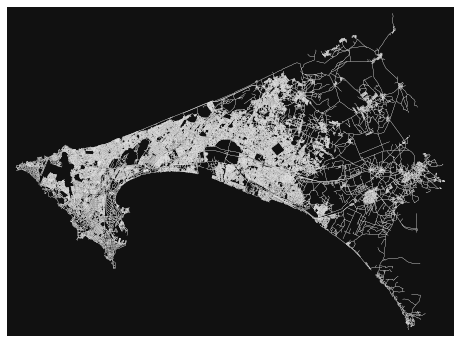

In [ ]:
fig, ax = ox.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.2)

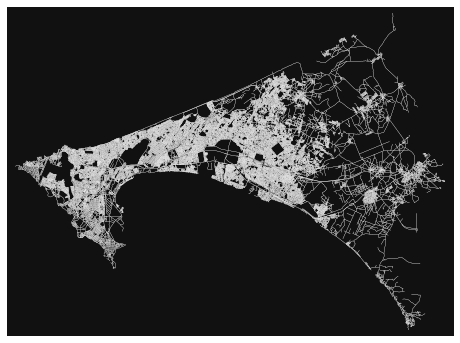

In [ ]:
polygon = df['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive')
fig, ax = ox.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.2)

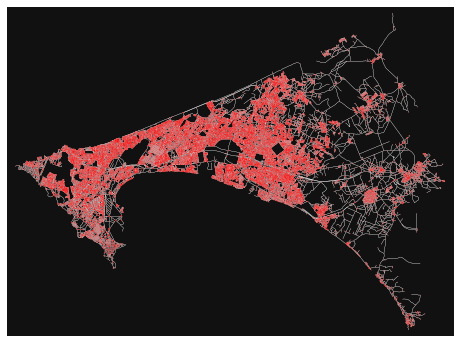

In [ ]:
fig, ax = ox.plot_graph(G, node_color='r',node_size=0.2, edge_color='w', edge_linewidth=0.2)

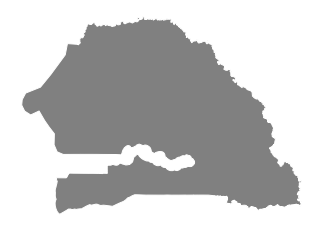

In [ ]:

# you can pass multiple queries with mixed types (dicts and strings)
senegal = ox.geocode_to_gdf([{'country':'Senegal'}])
senegal = ox.project_gdf(senegal)
ax = senegal.plot(fc='gray', ec='w')
_ = ax.axis('off')

In [ ]:
df.to_file('sen1_gjson', driver='GeoJSON')
df = gpd.read_file('sen1_gjson')

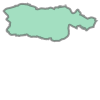

In [ ]:
dfregion = df.iloc[1].geometry
dfregion

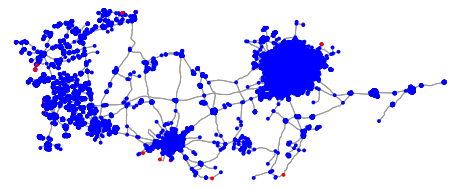

In [ ]:
# turn off strict mode and see what nodes we'd remove, in red
nc = ['b' if ox.simplification._is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3, bgcolor='#FFFFFF')

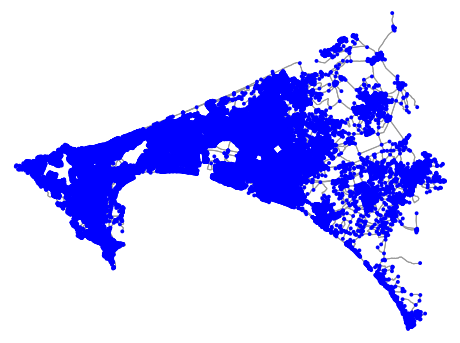

In [ ]:
# simplify the network

fig, ax = ox.plot_graph(G, node_color='b', node_zorder=3, bgcolor='#FFFFFF')